In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class MotorImageryDataset:
    def __init__(self, dataset='A01T.npz'):
        if not dataset.endswith('.npz'):
            dataset += '.npz'

        self.data = np.load(dataset)

        self.Fs = 250  # 250Hz from original paper

        # keys of data ['s', 'etyp', 'epos', 'edur', 'artifacts']

        self.raw = self.data['s'].T
        self.events_type = self.data['etyp'].T
        self.events_position = self.data['epos'].T
        self.events_duration = self.data['edur'].T
        self.artifacts = self.data['artifacts'].T

        # Types of motor imagery
        self.mi_types = {769: 'left', 770: 'right',
                         771: 'foot', 772: 'tongue', 783: 'unknown'}

    def get_trials_from_channel(self, channel=7):

        # Channel default is C3

        startrial_code = 768
        starttrial_events = self.events_type == startrial_code
        idxs = [i for i, x in enumerate(starttrial_events[0]) if x]

        trials = []
        classes = []

        for index in idxs:
            try:
                type_e = self.events_type[0, index+1]
                class_e = self.mi_types[type_e]
                classes.append(class_e)

                start = self.events_position[0, index]
                stop = start + self.events_duration[0, index]
                trial = self.raw[channel, start:stop]
                trial = trial.reshape((1, -1))
                trials.append(trial)

            except:
                continue

        return trials, classes

    def get_trials_from_channels(self, channels=[7, 9, 11]):
        trials_c = []
        classes_c = []
        for c in channels:
            t, c = self.get_trials_from_channel(channel=c)

            tt = np.concatenate(t, axis=0)
            trials_c.append(tt)
            classes_c.append(c)

        return trials_c, classes_c

In [3]:
datasetA1 = MotorImageryDataset('../A01T.npz')
trials, classes = datasetA1.get_trials_from_channels([7, 9, 11])

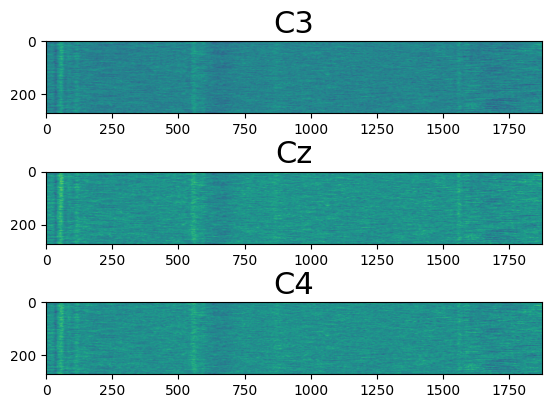

In [4]:
plt.subplot(3, 1, 1)
plt.imshow(trials[0])
plt.title('C3', size=22)
plt.subplot(3, 1, 2)
plt.imshow(trials[1])
plt.title('Cz', size=22)
plt.subplot(3, 1, 3)
plt.imshow(trials[2])
plt.title('C4', size=22)

plt.show()

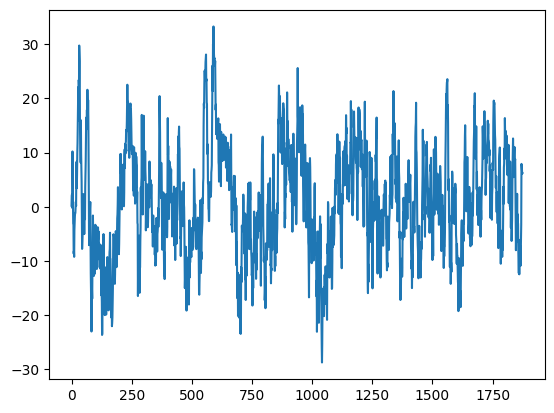

In [5]:
data = np.load('../A01T.npz')  # data contains the data of the subject 1

signal = data['s']
# The index 7 represent the channel C3, for the info of each channel read the original paper.
channelC3 = signal[:, 7]

x = 7  # this is the event number that I want to extract

# Extract the type of the event 7 in this case the type is 768 (in the table this is a Start of a trial event).
etype = data['etyp'].T[0, x]
# This is the position of the event in the raw signal
epos = data['epos'].T[0, x]
edur = data['edur'].T[0, x]  # And this is the duration of this event

# Then I extract the signal related the event selected.
trial = channelC3[epos:epos+edur]

# The selected event type is 768 (Start of a trial) if you see the array of event types ('etype')
# you can observe the next event is 772 (Cue onset tongue) with that you can deduce de class of
# this trial: Tongue Imagery Task.

# Then for know the class of this trial (7) you need to read the type of the inmediate next event
trial_type = data['etyp'].T[0, x+1]

# For know the order of this events, you can see the data['etyp'] array.

# You can plot this event with matplotlib
plt.plot(trial)
plt.show()